EDA y limpieza de datos

Carga de librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Carga de datos a limpiar

In [3]:
df_final_demo=pd.read_csv ("Proyectos semanales/Vanguard/df_final_demo.txt") 
df_experiment=pd.read_csv ("Proyectos semanales/Vanguard/df_final_experiment_clients.txt") 
df_data_1=pd.read_csv ("Proyectos semanales/Vanguard/df_final_web_data_pt_1.txt") 
df_data_2=pd.read_csv ("Proyectos semanales/Vanguard/df_final_web_data_pt_2.txt") 

Unimos los dataframes de data, son los que nos aportan información del funnel

In [8]:
df_data = pd.concat([df_data_1, df_data_2], sort=False)
df_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [9]:
# Verificar valores nulos
print(df_data.isnull().sum())

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


In [11]:
#contamos los pasos de este dataset
process_step_counts = df_data['process_step'].value_counts().sort_index()
process_step_counts

process_step
confirm    102963
start      243945
step_1     163193
step_2     133062
step_3     112242
Name: count, dtype: int64

In [41]:
#df_data.to_csv('Proyectos semanales/Vanguard/df_data.txt', index=False)

In [64]:
df_final_demo['clnt_tenure_yr'] = df_final_demo['clnt_tenure_yr'].fillna('0')
df_final_demo['clnt_tenure_yr'] = df_final_demo['clnt_tenure_yr'].round().astype(int)

In [14]:
df_final_demo['clnt_tenure_mnth'] = df_final_demo['clnt_tenure_mnth'].fillna('0')
df_final_demo['clnt_tenure_mnth'] = df_final_demo['clnt_tenure_mnth'].round().astype(int)

In [16]:
df_final_demo['clnt_age'] = df_final_demo['clnt_age'].fillna('0')
df_final_demo['clnt_age'] = df_final_demo['clnt_age'].round().astype(int)

In [20]:
df_final_demo['num_accts'] = df_final_demo['num_accts'].fillna('0')
df_final_demo['num_accts'] = df_final_demo['num_accts'].round().astype(int)

In [29]:
df_final_demo['gendr'] = df_final_demo['gendr'].fillna('U')

In [30]:
df_final_demo['gendr'] = df_final_demo['gendr'].replace('X', 'U')

In [24]:
df_final_demo['bal'] = df_final_demo['bal'].fillna('0')

In [34]:
df_final_demo['calls_6_mnth'] = df_final_demo['calls_6_mnth'].fillna('0')
df_final_demo['calls_6_mnth'] = df_final_demo['calls_6_mnth'].round().astype(int)

In [37]:
df_final_demo['logons_6_mnth'] = df_final_demo['logons_6_mnth'].fillna('0')
df_final_demo['logons_6_mnth'] = df_final_demo['logons_6_mnth'].round().astype(int)

In [38]:
df_final_demo.dtypes

client_id            int64
clnt_tenure_yr       int64
clnt_tenure_mnth     int64
clnt_age             int64
gendr               object
num_accts            int64
bal                 object
calls_6_mnth         int64
logons_6_mnth        int64
dtype: object

In [39]:
df_final_demo.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [40]:
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,U,2,45105.3,6,9
1,2304905,7,94,58,U,2,110860.3,6,9
2,1439522,5,64,32,U,2,52467.79,6,9
3,1562045,16,198,49,M,2,67454.65,3,6
4,5126305,12,145,33,F,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38,U,3,1411062.68,5,5
70605,8981690,12,148,31,M,2,101867.07,6,6
70606,333913,16,198,61,F,2,40745.0,3,3
70607,1573142,21,255,68,M,3,475114.69,4,4


In [42]:
#df_final_demo.to_csv('Proyectos semanales/Vanguard/df_final_demo.txt', index=False)

In [45]:
unique_clients = df_final_demo['client_id'].nunique()

print("Número de usuarios únicos (client_id):", unique_clients)


Número de usuarios únicos (client_id): 70609


In [4]:
df_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [14]:
#Unimos los dos df con id de cliente en común
df_users = pd.merge(df_final_demo, df_experiment, on='client_id', how='inner')

In [15]:
df_users.dtypes

client_id             int64
clnt_tenure_yr        int64
clnt_tenure_mnth      int64
clnt_age              int64
gendr                object
num_accts             int64
bal                 float64
calls_6_mnth          int64
logons_6_mnth         int64
Variation            object
dtype: object

In [16]:
#Identificamos los Nan
df_users.isnull().sum()

client_id               0
clnt_tenure_yr          0
clnt_tenure_mnth        0
clnt_age                0
gendr                   0
num_accts               0
bal                     0
calls_6_mnth            0
logons_6_mnth           0
Variation           20109
dtype: int64

In [18]:
df_users['Variation'] = df_users['Variation'].fillna('UN')

In [19]:
#Identificamos los usuarios de grupo de test, control e indefinidos
variation_counts = df_users['Variation'].value_counts().sort_index()
variation_counts

Variation
Control    23532
Test       26968
UN         20109
Name: count, dtype: int64

In [21]:
#revisamos que no hay duplicados 
duplicate_users_counts = df_users['client_id'].duplicated().sum()
duplicate_users_counts

0

Conociendo a los clientes

In [66]:
df_users

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,age_category,type_client
0,836976,6,73,60,U,2,45105.30,6,9,Test,Senior (56-75 años),Bronce
1,2304905,7,94,58,U,2,110860.30,6,9,Control,Senior (56-75 años),Plata
2,1439522,5,64,32,U,2,52467.79,6,9,Test,Joven (19-35 años),Plata
3,1562045,16,198,49,M,2,67454.65,3,6,Test,Adulto (36-55 años),Plata
4,5126305,12,145,33,F,2,103671.75,0,3,Control,Joven (19-35 años),Plata
...,...,...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38,U,3,1411062.68,5,5,UN,Adulto (36-55 años),Oro
70605,8981690,12,148,31,M,2,101867.07,6,6,UN,Joven (19-35 años),Plata
70606,333913,16,198,61,F,2,40745.00,3,3,UN,Senior (56-75 años),Bronce
70607,1573142,21,255,68,M,3,475114.69,4,4,UN,Senior (56-75 años),Oro


In [23]:
gendr_counts = df_users['gendr'].value_counts().sort_index()
gendr_counts

gendr
F    22746
M    23724
U    24139
Name: count, dtype: int64

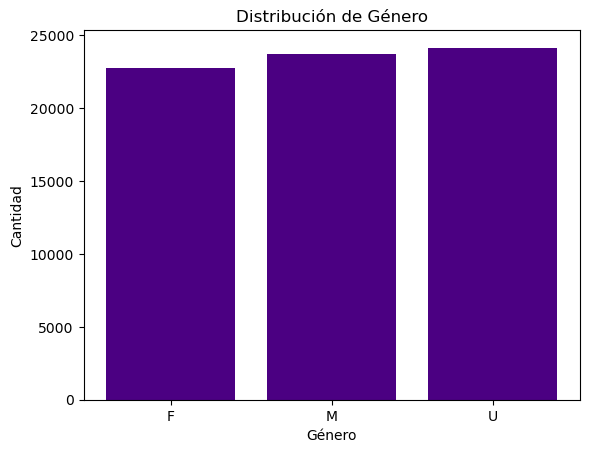

In [26]:
plt.bar(gendr_counts.index, gendr_counts.values, color='indigo')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Asegura que las etiquetas de género estén horizontalmente
plt.show()


In [29]:
bins = [0, 18, 35, 55, 75, float('inf')]  # float('inf') para cubrir todas las edades por encima de 75
labels = ['Niño (0-18 años)', 'Joven (19-35 años)', 'Adulto (36-55 años)', 'Senior (56-75 años)', 'Anciano Anciano (76+ años)']

# Crear la columna de categoría de edad
df_users['age_category'] = pd.cut(df_users['clnt_age'], bins=bins, labels=labels, right=True)

# Verificar los resultados
print(df_users[['clnt_age', 'age_category']].head())


   clnt_age         age_category
0        60  Senior (56-75 años)
1        58  Senior (56-75 años)
2        32   Joven (19-35 años)
3        49  Adulto (36-55 años)
4        33   Joven (19-35 años)


In [32]:
#df_users.to_csv('Proyectos semanales/Vanguard/df_users.txt', index=False)

In [67]:
df_users

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,age_category,type_client
0,836976,6,73,60,U,2,45105.30,6,9,Test,Senior (56-75 años),Bronce
1,2304905,7,94,58,U,2,110860.30,6,9,Control,Senior (56-75 años),Plata
2,1439522,5,64,32,U,2,52467.79,6,9,Test,Joven (19-35 años),Plata
3,1562045,16,198,49,M,2,67454.65,3,6,Test,Adulto (36-55 años),Plata
4,5126305,12,145,33,F,2,103671.75,0,3,Control,Joven (19-35 años),Plata
...,...,...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38,U,3,1411062.68,5,5,UN,Adulto (36-55 años),Oro
70605,8981690,12,148,31,M,2,101867.07,6,6,UN,Joven (19-35 años),Plata
70606,333913,16,198,61,F,2,40745.00,3,3,UN,Senior (56-75 años),Bronce
70607,1573142,21,255,68,M,3,475114.69,4,4,UN,Senior (56-75 años),Oro


In [58]:
# Definimos los bins y las etiquetas para los rangos
bins = [0, 50000, 150000, 1500000, float('inf')]  # float('inf') asegura que cubrimos todos los balances superiores a 100,000
labels = ['Bronce', 'Plata', 'Oro', 'Platino']

# Creamos la columna de tipo de cliente
df_users['type_client'] = pd.cut(df_users['bal'], bins=bins, labels=labels, right=False)

# Verificarmos los resultados
print(df_users[['bal', 'type_client']].head())


         bal type_client
0   45105.30      Bronce
1  110860.30       Plata
2   52467.79       Plata
3   67454.65       Plata
4  103671.75       Plata


In [60]:
type_client_counts = df_users['type_client'].value_counts().sort_index()
type_client_counts

type_client
Bronce     27664
Plata      26785
Oro        15602
Platino      558
Name: count, dtype: int64

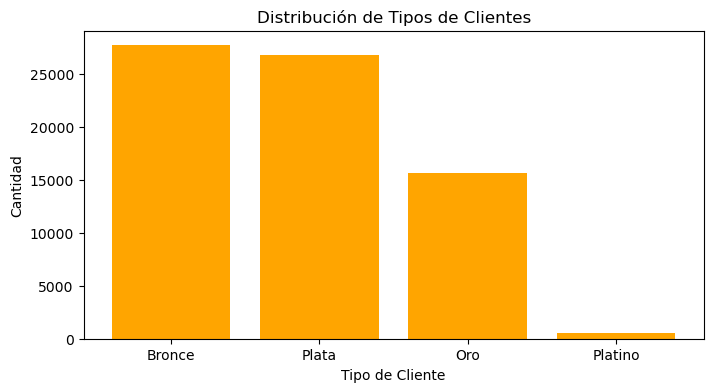

In [61]:
plt.figure(figsize=(8, 4))  # Configura el tamaño de la figura (puedes ajustarlo según necesites)
plt.bar(type_client_counts.index, type_client_counts.values, color='orange')  # Configura el color de las barras

# Añadir título y etiquetas a los ejes
plt.title('Distribución de Tipos de Clientes')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Cantidad')

# Mostrar la gráfica
plt.show()


In [68]:
clnt_tenure_yr_counts = df_users['clnt_tenure_yr'].value_counts().sort_index()
clnt_tenure_yr_counts

clnt_tenure_yr
0       14
2       81
3      449
4     4687
5     6955
6     7092
7     4955
8     4045
9     3357
10    2775
11    2920
12    3631
13    3607
14    3646
15    4564
16    2714
17    1373
18    1206
19    1153
20    1580
21    2257
22    1492
23    1279
24     846
25     484
26     660
27     632
28     507
29     309
30     303
31     166
32     191
33     206
34     175
35     102
36      36
37      35
38      33
39       9
40       9
41       1
42       6
43       6
44       3
45       1
46       5
47       6
48      16
49       4
50       8
51       5
52       2
54       1
55       9
62       1
Name: count, dtype: int64

In [69]:
# Definir los bins y las etiquetas para los rangos de antigüedad
bins = [0, 5, 10, 20, float('inf')]  # float('inf') para asegurarnos de incluir todos los años posibles
labels = ['Nuevo', 'Intermedio', 'Establecido', 'Veterano']

# Crear la columna 'old' con las categorías de antigüedad
df_users['old'] = pd.cut(df_users['clnt_tenure_yr'], bins=bins, labels=labels, right=False)

# Verificar los resultados
print(df_users[['clnt_tenure_yr', 'old']].head())

   clnt_tenure_yr          old
0               6   Intermedio
1               7   Intermedio
2               5   Intermedio
3              16  Establecido
4              12  Establecido


In [74]:
old_counts = df_users['old'].value_counts().sort_index()
old_counts

old
Nuevo           5231
Intermedio     26404
Establecido    27589
Veterano       11385
Name: count, dtype: int64

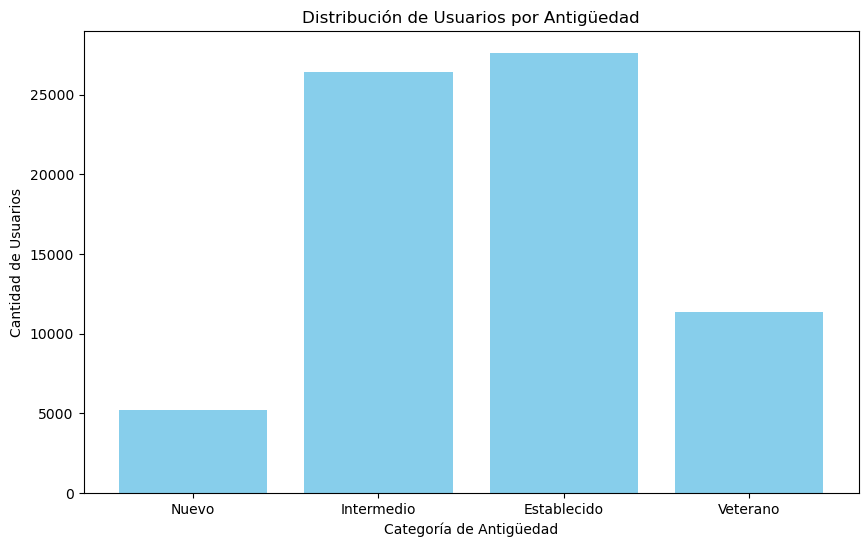

In [75]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura
plt.bar(old_counts.index, old_counts.values, color='skyblue')  # Elige el color que prefieras

# Añadir título y etiquetas a los ejes
plt.title('Distribución de Usuarios por Antigüedad')
plt.xlabel('Categoría de Antigüedad')
plt.ylabel('Cantidad de Usuarios')

# Mostrar la gráfica
plt.show()


In [76]:
num_accts_counts = df_users['num_accts'].value_counts().sort_index()
num_accts_counts

num_accts
0       14
1        2
2    55497
3    12529
4     2241
5      284
6       33
7        8
8        1
Name: count, dtype: int64

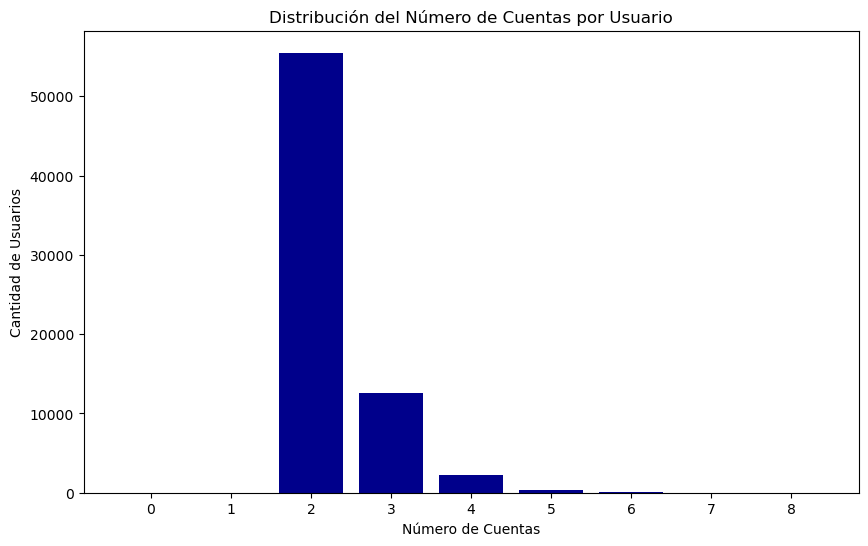

In [77]:
plt.figure(figsize=(10, 6))  # Configura el tamaño de la figura
plt.bar(num_accts_counts.index, num_accts_counts.values, color='darkblue')  # Usa un color azul oscuro para las barras

# Añadir título y etiquetas a los ejes
plt.title('Distribución del Número de Cuentas por Usuario')
plt.xlabel('Número de Cuentas')
plt.ylabel('Cantidad de Usuarios')

# Mejorar la visualización en el eje X
plt.xticks(range(0, max(num_accts_counts.index)+1))  # Asegura que todos los números de cuentas aparezcan como ticks

# Mostrar la gráfica
plt.show()


In [71]:
#df_users.to_csv('Proyectos semanales/Vanguard/df_users.txt', index=False)

In [73]:
df_users

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,age_category,type_client,old
0,836976,6,73,60,U,2,45105.30,6,9,Test,Senior (56-75 años),Bronce,Intermedio
1,2304905,7,94,58,U,2,110860.30,6,9,Control,Senior (56-75 años),Plata,Intermedio
2,1439522,5,64,32,U,2,52467.79,6,9,Test,Joven (19-35 años),Plata,Intermedio
3,1562045,16,198,49,M,2,67454.65,3,6,Test,Adulto (36-55 años),Plata,Establecido
4,5126305,12,145,33,F,2,103671.75,0,3,Control,Joven (19-35 años),Plata,Establecido
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38,U,3,1411062.68,5,5,UN,Adulto (36-55 años),Oro,Nuevo
70605,8981690,12,148,31,M,2,101867.07,6,6,UN,Joven (19-35 años),Plata,Establecido
70606,333913,16,198,61,F,2,40745.00,3,3,UN,Senior (56-75 años),Bronce,Establecido
70607,1573142,21,255,68,M,3,475114.69,4,4,UN,Senior (56-75 años),Oro,Veterano


In [63]:
#Unimos los dos df con id de cliente en común
merged_df = pd.merge(df_data, df_experiment, on='client_id', how='inner')

In [64]:
merged_df

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
449826,9895983,473024645_56027518531,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,NaN
449827,9895983,473024645_56027518531,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,NaN
449828,9895983,473024645_56027518531,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,NaN
449829,9895983,473024645_56027518531,498981662_93503779869_272484,start,2017-06-15 19:50:00,NaN


In [65]:
variation_counts_total = merged_df['Variation'].value_counts().sort_index()
variation_counts_total

Variation
Control    143462
Test       177847
Name: count, dtype: int64

In [66]:
merged_df.isnull().sum()

client_id            0
visitor_id           0
visit_id             0
process_step         0
date_time            0
Variation       128522
dtype: int64

In [68]:
df_clean = merged_df.dropna(subset=['Variation'])
df_clean 

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
417650,1574008,117364417_77840596075,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
417651,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
417652,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
417653,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [69]:
process_step_counts_exp = df_clean['process_step'].value_counts().sort_index()
process_step_counts_exp

process_step
confirm     43227
start      104082
step_1      68436
step_2      56875
step_3      48689
Name: count, dtype: int64

In [70]:
#creamos un df con solo los usuarios del test
df_test = df_clean[df_clean['Variation'] == 'Test']
df_test

,client_id,visitor_id,visit_id,process_step,date_time,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...,...
417646,1574008,117364417_77840596075,528720790_71583064618_169151,confirm,2017-05-06 23:51:05,Test
417647,1574008,117364417_77840596075,528720790_71583064618_169151,step_3,2017-05-06 23:50:40,Test
417648,1574008,117364417_77840596075,528720790_71583064618_169151,step_2,2017-05-06 23:43:47,Test
417649,1574008,117364417_77840596075,528720790_71583064618_169151,step_1,2017-05-06 23:43:34,Test


In [71]:
process_df_test= df_test['process_step'].value_counts().sort_index()
process_df_test

process_step
confirm    25722
start      56474
step_1     38768
step_2     30989
step_3     25894
Name: count, dtype: int64

In [75]:
#process_df_test.to_csv('Proyectos semanales/Proyecto 2/process_df_test.txt', index=False)

In [72]:
#creamos un df con solo los usuarios del control
df_control = df_clean[df_clean['Variation'] == 'Control']
df_control

,client_id,visitor_id,visit_id,process_step,date_time,Variation
13,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:03,Control
14,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:29:01,Control
15,4033851,762728880_76361333336,949661017_22392791362_127391,confirm,2017-04-05 12:28:52,Control
16,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:26:08,Control
17,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:24:43,Control
...,...,...,...,...,...,...
417643,433098,5505424_50616523266,773565250_67577573147_389841,start,2017-05-13 15:30:47,Control
417651,2908510,814969699_90652851448,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
417652,2908510,814969699_90652851448,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
417653,2908510,814969699_90652851448,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [73]:
process_df_control= df_control['process_step'].value_counts().sort_index()
process_df_control

process_step
confirm    17505
start      47608
step_1     29668
step_2     25886
step_3     22795
Name: count, dtype: int64

In [74]:
#process_df_control.to_csv('Proyectos semanales/Proyecto 2/process_df_control.txt', index=False)

In [61]:
#df_data.to_csv('Proyectos semanales/Proyecto 2/df_data.txt', index=False)